In [1]:
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


In [2]:
# reading dataset
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 0)
# getting the shape of the data
data.shape

(3150, 5)

In [3]:
# describing the data set
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [4]:
# checking if there is any null data or not
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [5]:
# adding a length column for analyzing the length of the reviews
data['length'] = data['verified_reviews'].apply(len)
data.head(5)


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [6]:
data['length'].value_counts()#series labeld one dimensional array


1       81
11      48
13      44
8       41
18      37
        ..
612      1
604      1
594      1
592      1
1330     1
Name: length, Length: 490, dtype: int64

In [7]:
data['feedback'].value_counts()#series labeld one dimensional array


1    2893
0     257
Name: feedback, dtype: int64

In [8]:
ratings = data['rating'].value_counts()#series labeld one dimensional array
ratings


5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [9]:
label_rating = ratings.index
label_rating

Int64Index([5, 4, 1, 3, 2], dtype='int64')

In [10]:
size_rating = ratings.values
size_rating

array([2286,  455,  161,  152,   96])

In [11]:
colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']
rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

In [12]:
df = [rating_piechart]
df

[Pie({
     'hole': 0.3,
     'labels': array([5, 4, 1, 3, 2]),
     'marker': {'colors': ['pink', 'lightblue', 'aqua', 'gold', 'crimson']},
     'name': 'Alexa',
     'values': array([2286,  455,  161,  152,   96])
 })]

In [13]:
layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')
fig = go.Figure(data = df,
                 layout = layout)
py.iplot(fig)

In [14]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

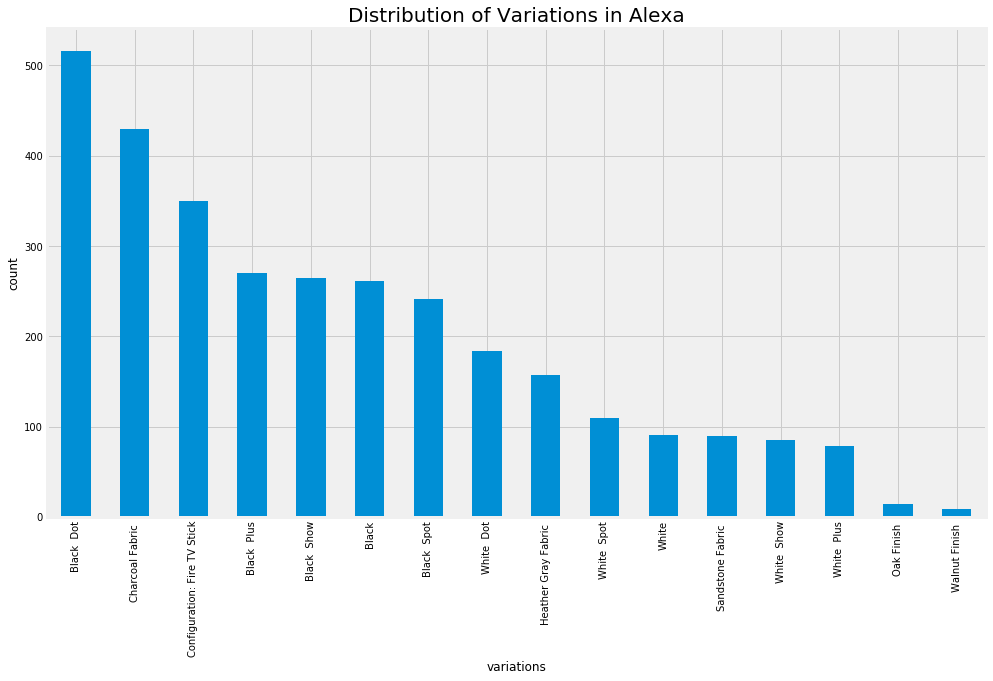

In [15]:

data['variation'].value_counts().plot.bar(figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [16]:
feedbacks = data['feedback'].value_counts()
feedbacks

1    2893
0     257
Name: feedback, dtype: int64

In [17]:
label_feedback = feedbacks.index
label_feedback


Int64Index([1, 0], dtype='int64')

In [18]:
size_feedback = feedbacks.values
size_feedback

array([2893,  257])

In [19]:
colors = ['yellow', 'lightgreen']
feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)
df2 = [feedback_piechart]
layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')
fig = go.Figure(data = df2,
                 layout = layout)
py.iplot(fig)

In [20]:
data['length'].value_counts()

1       81
11      48
13      44
8       41
18      37
        ..
612      1
604      1
594      1
592      1
1330     1
Name: length, Length: 490, dtype: int64

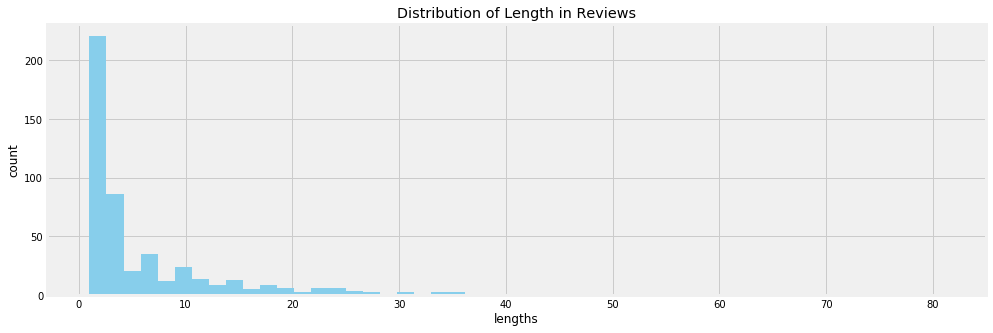

In [21]:
data['length'].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

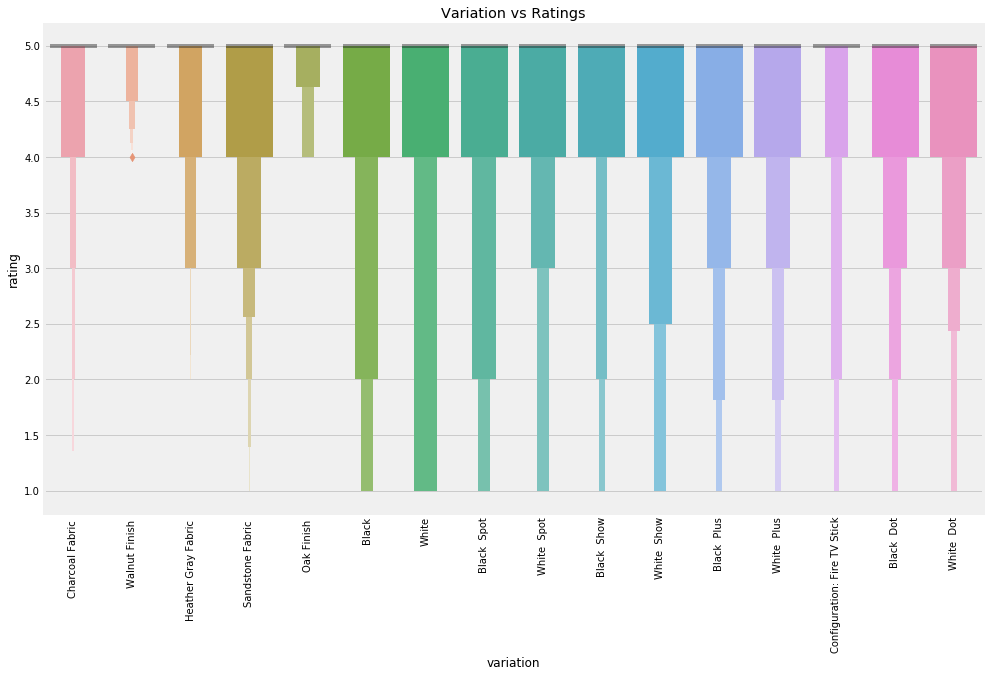

In [22]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.boxenplot(data['variation'], data['rating'])
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

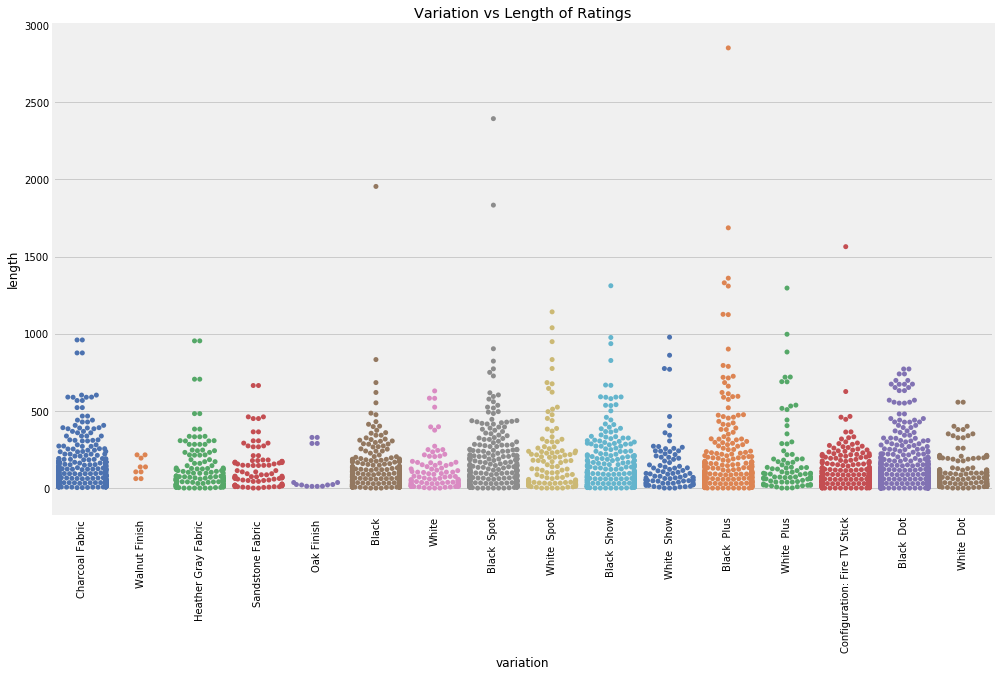

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(data['variation'], data['length'], palette = 'deep')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)#x axis label rotation
plt.show()

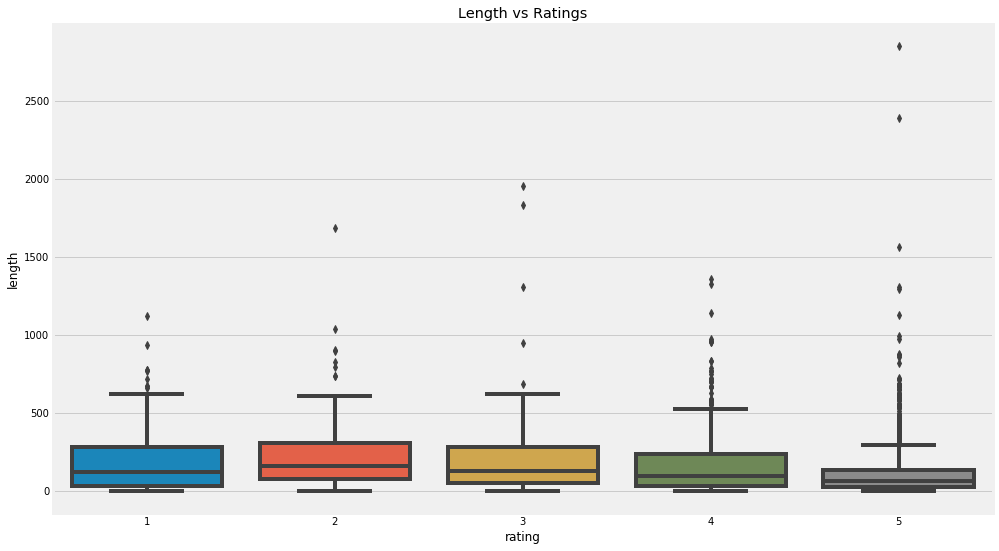

In [24]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.boxplot(data['rating'], data['length'])
plt.title("Length vs Ratings")
plt.show()

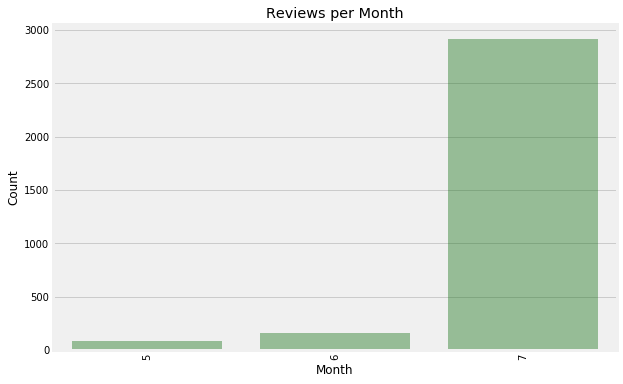

In [25]:
rating_review=data.sort_values(by='rating',ascending=False)
rating_review.head()
rating_review['date'] = pd.to_datetime(rating_review['date'], errors='coerce')
month_count = rating_review['date'].dt.month.value_counts()
month_count = month_count.sort_index()
plt.figure(figsize=(9,6))
sns.barplot(month_count.index, month_count.values,color='green',alpha=0.4)
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Reviews per Month")
plt.show()

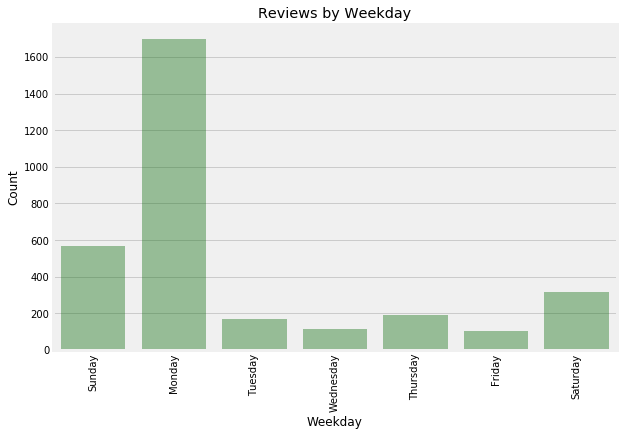

In [26]:
weekday_count = rating_review['date'].dt.weekday_name.value_counts()
weekday_count = weekday_count.sort_index()
plt.figure(figsize=(9,6))
sns.barplot(weekday_count.index, weekday_count.values,color='green',alpha=0.4,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation='vertical')
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Reviews by Weekday")
plt.show()

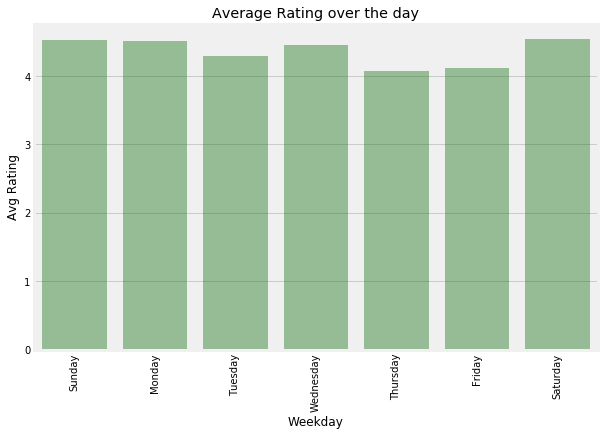

In [27]:
rating_review['weekday']=rating_review['date'].dt.weekday_name
avg_weekday=rating_review.groupby('weekday')['rating'].mean()
plt.figure(figsize=(9,6))
sns.barplot(avg_weekday.index, avg_weekday.values,color='green',alpha=0.4,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation='vertical')
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Avg Rating', fontsize=12)
plt.title("Average Rating over the day")
plt.show()

In [28]:
#analysing positive reviews
pdata=data[data.rating!=1]
pdata=pdata[pdata.rating!=2]
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(pdata.verified_reviews)
words

<2893x3395 sparse matrix of type '<class 'numpy.int64'>'
	with 28959 stored elements in Compressed Sparse Row format>

In [30]:
sum_words = words.sum(axis=0)
sum_words


matrix([[ 4, 17, 12, ...,  1,  1,  1]], dtype=int64)

In [31]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq

[('love', 949),
 ('echo', 747),
 ('loved', 41),
 ('playing', 69),
 ('game', 2),
 ('answer', 26),
 ('question', 7),
 ('correctly', 7),
 ('alexa', 578),
 ('says', 19),
 ('got', 115),
 ('wrong', 10),
 ('answers', 15),
 ('like', 461),
 ('able', 99),
 ('turn', 76),
 ('lights', 92),
 ('away', 25),
 ('home', 200),
 ('lot', 70),
 ('fun', 153),
 ('thing', 104),
 ('yr', 3),
 ('old', 43),
 ('learns', 8),
 ('dinosaurs', 1),
 ('control', 67),
 ('play', 190),
 ('games', 28),
 ('categories', 1),
 ('nice', 91),
 ('sound', 312),
 ('music', 508),
 ('received', 16),
 ('gift', 49),
 ('needed', 24),
 ('bluetooth', 47),
 ('easily', 29),
 ('accessible', 2),
 ('smart', 171),
 ('speaker', 216),
 ('wait', 15),
 ('having', 121),
 ('cellphone', 2),
 ('use', 436),
 ('features', 58),
 ('ipad', 4),
 ('great', 711),
 ('alarm', 103),
 ('deaf', 2),
 ('hear', 47),
 ('bedroom', 77),
 ('living', 36),
 ('room', 127),
 ('reason', 25),
 ('ask', 99),
 ('random', 8),
 ('questions', 61),
 ('response', 15),
 ('does', 118),
 ('sm

In [32]:
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_freq

[('love', 949),
 ('echo', 747),
 ('great', 711),
 ('alexa', 578),
 ('music', 508),
 ('like', 461),
 ('use', 436),
 ('works', 358),
 ('easy', 341),
 ('sound', 312),
 ('just', 291),
 ('set', 286),
 ('good', 262),
 ('dot', 246),
 ('speaker', 216),
 ('product', 216),
 ('home', 200),
 ('amazon', 196),
 ('play', 190),
 ('smart', 171),
 ('really', 167),
 ('new', 167),
 ('34', 167),
 ('bought', 165),
 ('time', 162),
 ('better', 160),
 ('device', 159),
 ('fun', 153),
 ('quality', 152),
 ('prime', 150),
 ('day', 138),
 ('far', 137),
 ('don', 129),
 ('things', 128),
 ('room', 127),
 ('having', 121),
 ('does', 118),
 ('got', 115),
 ('house', 115),
 ('tv', 113),
 ('learning', 112),
 ('work', 111),
 ('plus', 110),
 ('devices', 110),
 ('little', 105),
 ('thing', 104),
 ('alarm', 103),
 ('weather', 101),
 ('able', 99),
 ('ask', 99),
 ('lights', 92),
 ('nice', 91),
 ('using', 91),
 ('voice', 90),
 ('spot', 90),
 ('used', 87),
 ('clock', 87),
 ('need', 87),
 ('video', 87),
 ('screen', 86),
 ('amazing', 

In [33]:
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency

,word,freq
0,love,949
1,echo,747
2,great,711
3,alexa,578
4,music,508
...,...,...
3390,scratch,1
3391,cbs,1
3392,traveling,1
3393,installs,1


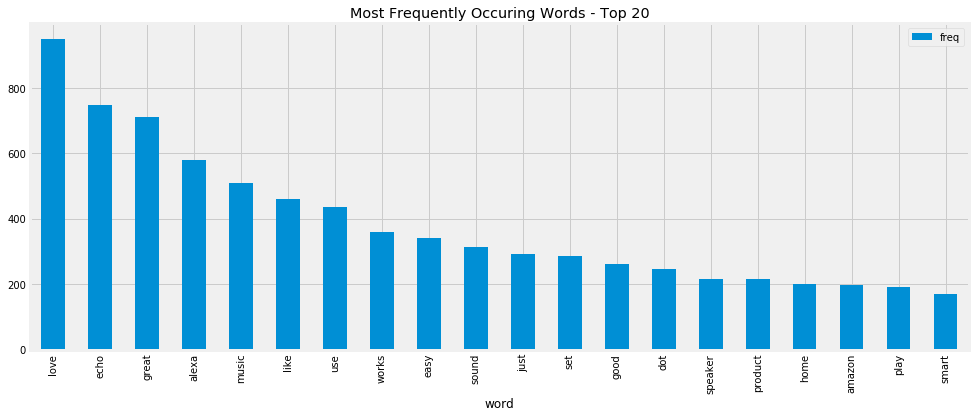

In [34]:
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

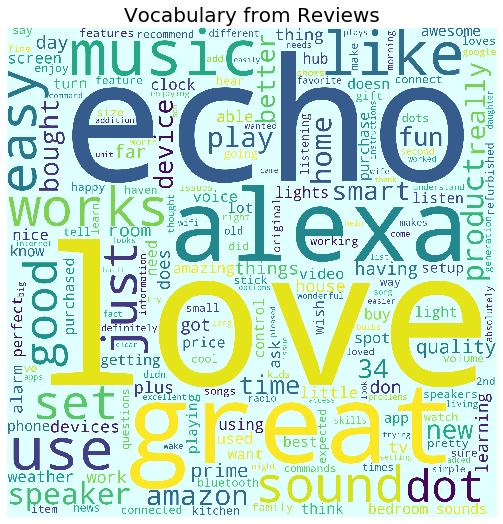

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

In [36]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nandana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
corpus = []
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [38]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

cv.vocabulary_

{'love': 1303,
 'echo': 749,
 'sometim': 1973,
 'play': 1611,
 'game': 988,
 'answer': 119,
 'question': 1695,
 'correctli': 534,
 'alexa': 76,
 'say': 1806,
 'got': 1034,
 'wrong': 2473,
 'like': 1276,
 'abl': 4,
 'turn': 2284,
 'light': 1274,
 'away': 194,
 'home': 1117,
 'lot': 1300,
 'fun': 974,
 'thing': 2185,
 'yr': 2495,
 'old': 1478,
 'learn': 1261,
 'dinosaur': 671,
 'control': 518,
 'categori': 377,
 'nice': 1428,
 'sound': 1989,
 'music': 1390,
 'well': 2421,
 'receiv': 1725,
 'gift': 1011,
 'need': 1407,
 'anoth': 118,
 'bluetooth': 282,
 'someth': 1972,
 'easili': 746,
 'access': 11,
 'found': 958,
 'smart': 1938,
 'speaker': 2003,
 'wait': 2390,
 'see': 1830,
 'els': 776,
 'without': 2450,
 'cellphon': 386,
 'cannot': 359,
 'use': 2345,
 'mani': 1321,
 'featur': 898,
 'ipad': 1201,
 'great': 1053,
 'alarm': 71,
 'almost': 85,
 'deaf': 600,
 'hear': 1095,
 'bedroom': 234,
 'live': 1285,
 'room': 1785,
 'reason': 1722,
 'enough': 794,
 'keep': 1219,
 'ask': 161,
 'random': 

In [39]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2520, 2500)
(2520,)
(630, 2500)
(630,)


In [42]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


In [43]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
#modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

/home/nandana/my_project_dir/my_project_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
rf=accuracy_score(y_test, y_pred)
rf=round(rf,2)
rf

[[ 21  34]
 [  6 569]]


              precision    recall  f1-score   support

           0       0.78      0.38      0.51        55
           1       0.94      0.99      0.97       575

    accuracy                           0.94       630
   macro avg       0.86      0.69      0.74       630
weighted avg       0.93      0.94      0.93       630



0.94

In [48]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lgm=LogisticRegression()
lgm.fit(x_train, y_train)
lgm_y=lgm.predict(x_test)

/home/nandana/my_project_dir/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [49]:
lgm_y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, lgm_y))
print('\n')
print(classification_report(y_test, lgm_y))

from sklearn.metrics import accuracy_score
lg=accuracy_score(y_test, lgm_y)
lg=round(lg,2)
lg

[[ 16  39]
 [  1 574]]


              precision    recall  f1-score   support

           0       0.94      0.29      0.44        55
           1       0.94      1.00      0.97       575

    accuracy                           0.94       630
   macro avg       0.94      0.64      0.71       630
weighted avg       0.94      0.94      0.92       630



0.94

In [51]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
NBypred=nb.predict(x_test)
NBypred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, NBypred))
print('\n')
print(classification_report(y_test, NBypred))

nb=accuracy_score(y_test, NBypred)
nb=round(nb,2)
nb

[[ 19  36]
 [  8 567]]


              precision    recall  f1-score   support

           0       0.70      0.35      0.46        55
           1       0.94      0.99      0.96       575

    accuracy                           0.93       630
   macro avg       0.82      0.67      0.71       630
weighted avg       0.92      0.93      0.92       630



0.93

In [55]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train) 
predsvm=clf.predict(x_test)

/home/nandana/my_project_dir/my_project_env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [56]:
predsvm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [57]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsvm))
print('\n')
print(classification_report(y_test, predsvm))


svm=accuracy_score(y_test, predsvm)
svm=round(svm,2)
svm

[[  0  55]
 [  0 575]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.91      1.00      0.95       575

    accuracy                           0.91       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.83      0.91      0.87       630



/home/nandana/my_project_dir/my_project_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



0.91

In [59]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [60]:
predsknn=neigh.predict(x_test)

In [61]:
predsknn

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))

knn=accuracy_score(y_test,predsknn)
knn=round(knn,2)
knn

[[ 12  43]
 [ 64 511]]


              precision    recall  f1-score   support

           0       0.16      0.22      0.18        55
           1       0.92      0.89      0.91       575

    accuracy                           0.83       630
   macro avg       0.54      0.55      0.54       630
weighted avg       0.86      0.83      0.84       630



0.83

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gmodel= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gmodel.fit(x_train, y_train)
predicted= gmodel.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))

gb=accuracy_score(y_test,predicted)
gb=round(gb,2)
gb

[[  9  46]
 [  9 566]]


              precision    recall  f1-score   support

           0       0.50      0.16      0.25        55
           1       0.92      0.98      0.95       575

    accuracy                           0.91       630
   macro avg       0.71      0.57      0.60       630
weighted avg       0.89      0.91      0.89       630



0.91

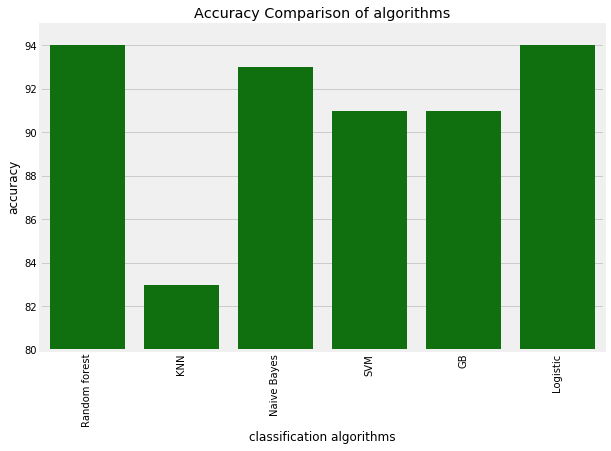

In [65]:
plt.figure(figsize=(9,6))
acc=[rf*100,knn*100,nb*100,svm*100,gb*100,lg*100]
alg=["Random forest",'KNN','Naive Bayes','SVM','GB','Logistic']
plt.ylim(80,95)

sns.barplot(alg, acc,color='green')
plt.xticks(rotation='vertical')

plt.xlabel('classification algorithms', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title("Accuracy Comparison of algorithms")
plt.show()

In [66]:
testdata=[['I loved the product.It is awsome'],['good I like it'],['i hate hate hate hate hate hate it'],['good product']]
testdf= pd.DataFrame(testdata, columns = ['new_review']) 
testdf

,new_review
0,I loved the product.It is awsome
1,good I like it
2,i hate hate hate hate hate hate it
3,good product


In [67]:
for i in range(0, 4):
    treview = re.sub('[^a-zA-Z]', ' ', testdf['new_review'][i])
    treview = treview.lower()
    treview = treview.split()
    tps = PorterStemmer()
    treview = [tps.stem(word) for word in treview if not word in set(stopwords.words('english'))]
    treview = ' '.join(treview)
    corpus.insert(0,treview)
corpus

['good product',
 'hate hate hate hate hate hate',
 'good like',
 'love product awsom',
 'love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas

In [68]:
tcv = CountVectorizer(max_features = 2500)
tx = tcv.fit_transform(corpus).toarray()
tcv.vocabulary_

{'good': 1030,
 'product': 1671,
 'hate': 1091,
 'like': 1277,
 'love': 1304,
 'awsom': 198,
 'echo': 749,
 'sometim': 1973,
 'play': 1611,
 'game': 988,
 'answer': 119,
 'question': 1696,
 'correctli': 534,
 'alexa': 76,
 'say': 1807,
 'got': 1034,
 'wrong': 2473,
 'abl': 4,
 'turn': 2284,
 'light': 1275,
 'away': 194,
 'home': 1118,
 'lot': 1301,
 'fun': 974,
 'thing': 2185,
 'yr': 2495,
 'old': 1479,
 'learn': 1262,
 'dinosaur': 671,
 'control': 518,
 'categori': 377,
 'nice': 1428,
 'sound': 1989,
 'music': 1391,
 'well': 2421,
 'receiv': 1726,
 'gift': 1011,
 'need': 1407,
 'anoth': 118,
 'bluetooth': 282,
 'someth': 1972,
 'easili': 746,
 'access': 11,
 'found': 958,
 'smart': 1938,
 'speaker': 2003,
 'wait': 2390,
 'see': 1830,
 'els': 776,
 'without': 2450,
 'cellphon': 386,
 'cannot': 359,
 'use': 2345,
 'mani': 1322,
 'featur': 898,
 'ipad': 1202,
 'great': 1053,
 'alarm': 71,
 'almost': 85,
 'deaf': 600,
 'hear': 1096,
 'bedroom': 234,
 'live': 1286,
 'room': 1786,
 'reason'

In [69]:
tx

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [70]:
tx[0:4,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [71]:
yt_pred = lgm.predict(tx[0:4,:])

In [72]:
yt_pred

array([1, 0, 1, 1])